# HR and Job Analysis Prediction

Dataset: [Link](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction)

Dataset Description:

This dataset contains historical data on employees working at a company, covering various information related to employee conditions, such as number of working hours, department, salary, and other supporting data.

|       Feature         |  Data Type  |                                                Description                                                                    
|-----------------------|-------------|-------------------------------------------------------------------------------------------------------------------------------  |
| satisfaction_level    |    Float    | Employee satisfication level is a measured used to assess the extent to which employees feel satisfied with their jobs and work envirotment at the company |
| last_evaluation       |    Float    | Final evaluation score for employees                                                                                            | 
| number_project        |     Int     | The number of projects employees work on                                                                                        |
| average_montly_hours  |     Int     | Average working hours of employee                                                                                               |
| time_spend_company    |     Int     | Number of years an employee has been with the company                                                                           |
| Work_accident         |     Int     | Did employees experince any incidents while working at the company                                                              | 
| left                  |     Int     | Are employees leaving the company                                                                                               |
| promotion_last_5years |     Int     | Did the employee receive a promotion in the last 5 years                                                                        | 
| Department            |    String   | Employee Department                                                                                                             |
| salary                |    String   | Employee' salaries during their employment at the company each month                                                            | 

Purpose :Performing  Exploratory Data Analysis (EDA) to discover insights from the data and identify problems in the data. Processing data to improve the dataset so that it can be used to tain machine learning to predict Exam Score base features in the dataset

# Preparation

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
warnings.filterwarnings('ignore', category=FutureWarning)

## Import Dataset

In [2]:
Data=pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')
Data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Understanding

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
Data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
Data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
Sum_of_duplicated=Data.duplicated().sum()
print("Sum of Duplicate Data:", Sum_of_duplicated)

Sum of Duplicate Data: 3008


In [7]:
row, col=Data.shape
print("Number of Rows in Dataframe:",row)
print("Number of Columns in Dataframe:", col)

Number of Rows in Dataframe: 14999
Number of Columns in Dataframe: 10


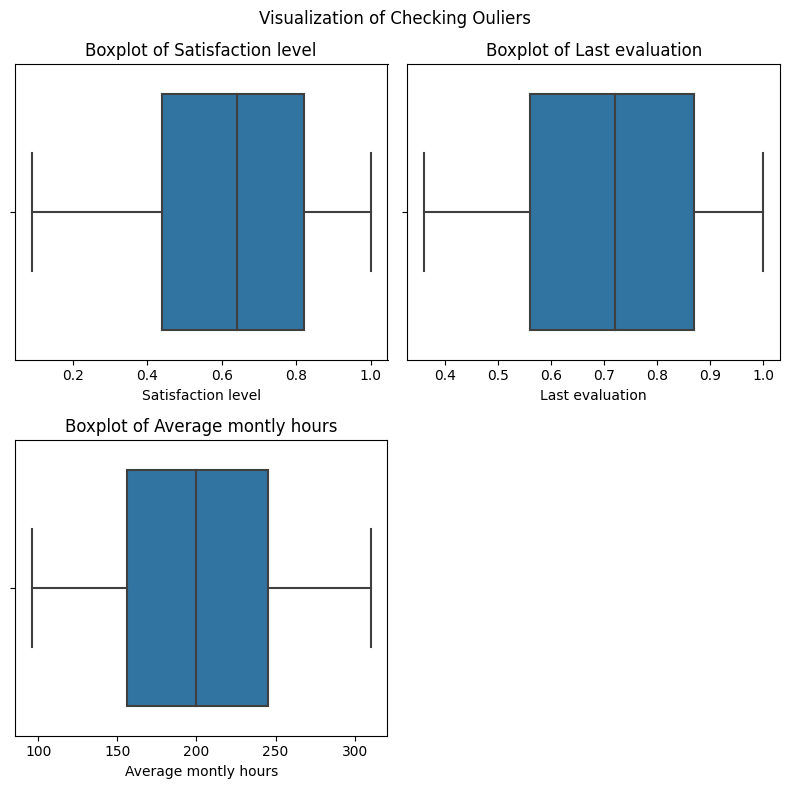

In [8]:
num_cols=['satisfaction_level',	'last_evaluation','average_montly_hours']
fig, axes=plt.subplots(2,2, figsize=(8,8))
axes=axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=Data, x=col, ax=axes[i])
    axes[i].set_xlabel(col.capitalize().replace('_',' '))
    axes[i].set_title(f'Boxplot of {col.capitalize().replace("_", " ")}')
    
plt.suptitle('Visualization of Checking Ouliers')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

# Cleaning Data

## Drop Duplicate Data

In [9]:
Data=Data.drop_duplicates()
Data.duplicated().sum()

0

# EDA (Exploratory Data Analysis)

## Univariate Analysis

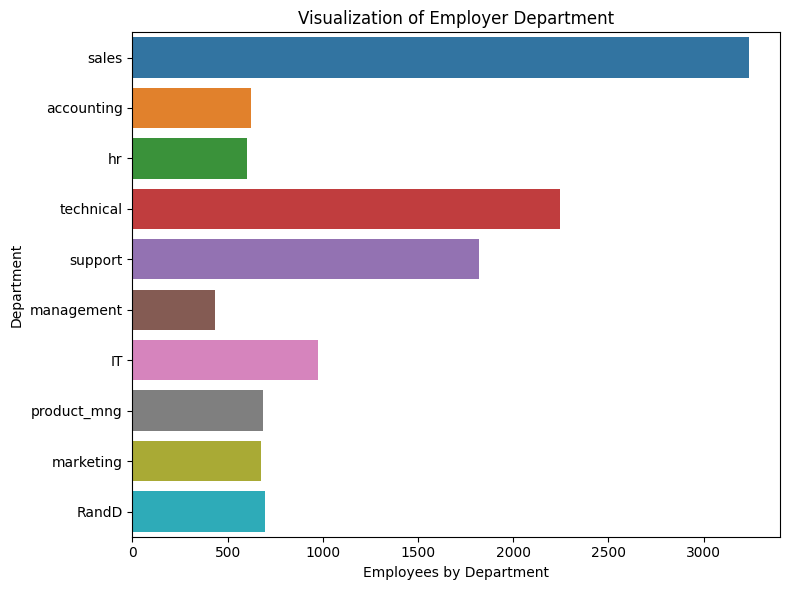

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, y='Department')
plt.title('Visualization of Employer Department')
plt.xlabel('Employees by Department')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

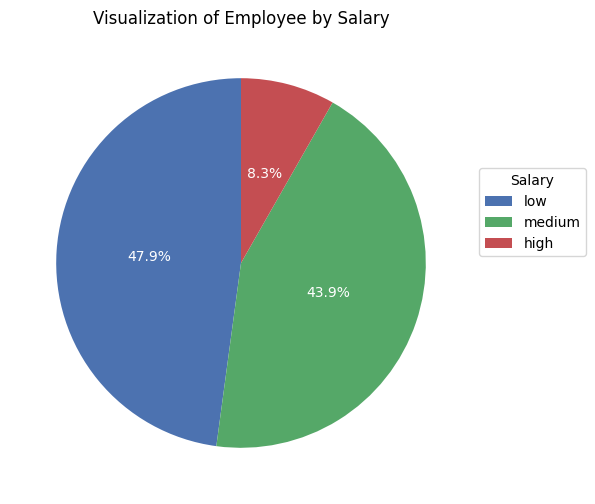

In [11]:
count_salary=Data['salary'].value_counts()
plt.figure(figsize=(6,6))
colors = ['#4C72B0', '#55A868', '#C44E52']
wedges, textst, autotexts=plt.pie(
    count_salary.values, 
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Employee by Salary')
plt.legend(wedges, count_salary.index, title='Salary',loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

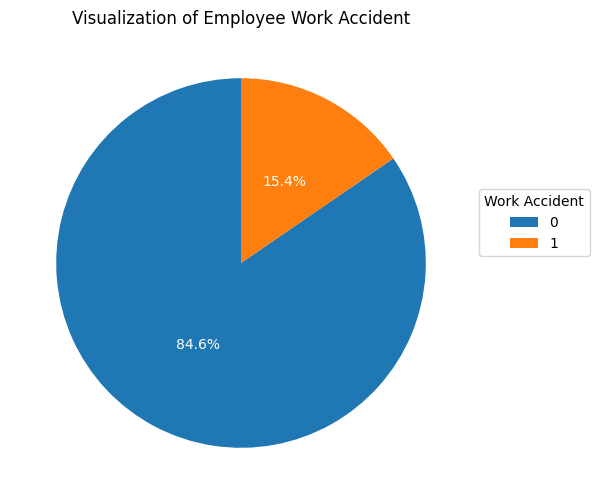

In [12]:
count_work_accident=Data['Work_accident'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotextst=plt.pie(
    count_work_accident.values,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.5,
    textprops={'color':'white'}
)
plt.title('Visualization of Employee Work Accident')
plt.legend(wedges, count_work_accident.index, title='Work Accident', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()

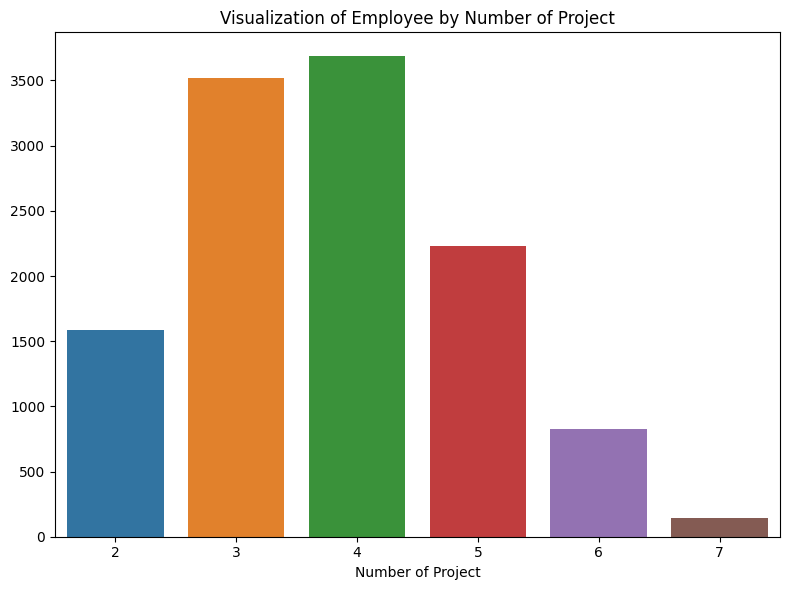

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='number_project')
plt.xlabel('Number of Project')
plt.ylabel('')
plt.title('Visualization of Employee by Number of Project')
plt.tight_layout()
plt.show()

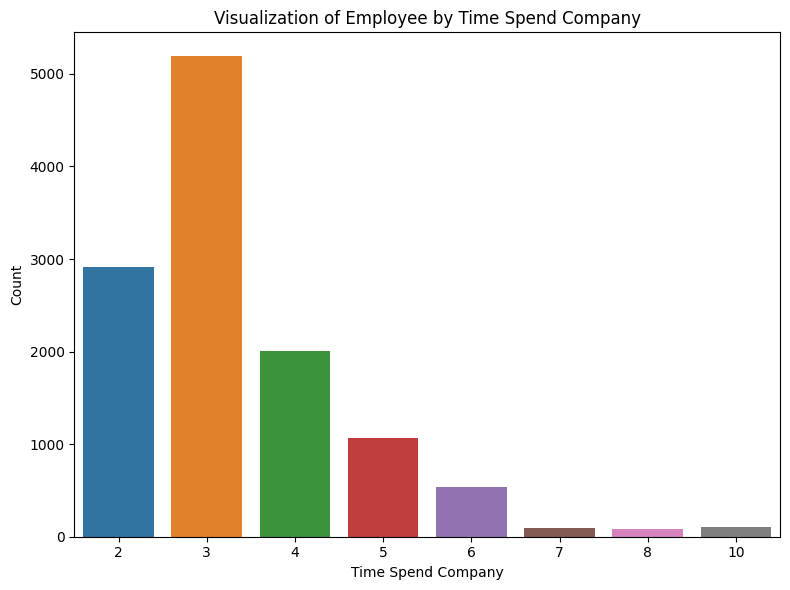

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='time_spend_company')
plt.xlabel('Time Spend Company')
plt.ylabel('Count')
plt.title('Visualization of Employee by Time Spend Company')
plt.tight_layout()
plt.show()

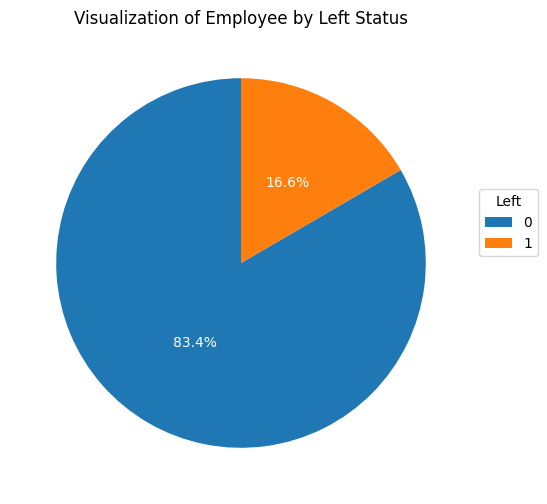

In [15]:
count_left=Data['left'].value_counts()
plt.figure(figsize=(6,6))
wedges, autotexts, texts=plt.pie(
    count_left.values,
    autopct='%1.1f%%',
    pctdistance=0.5,
    startangle=90,
    textprops={'color':'white'}
)
plt.title('Visualization of Employee by Left Status')
plt.legend(wedges, count_left.index, title='Left', loc='lower left', bbox_to_anchor=(1,0.5))
plt.show()


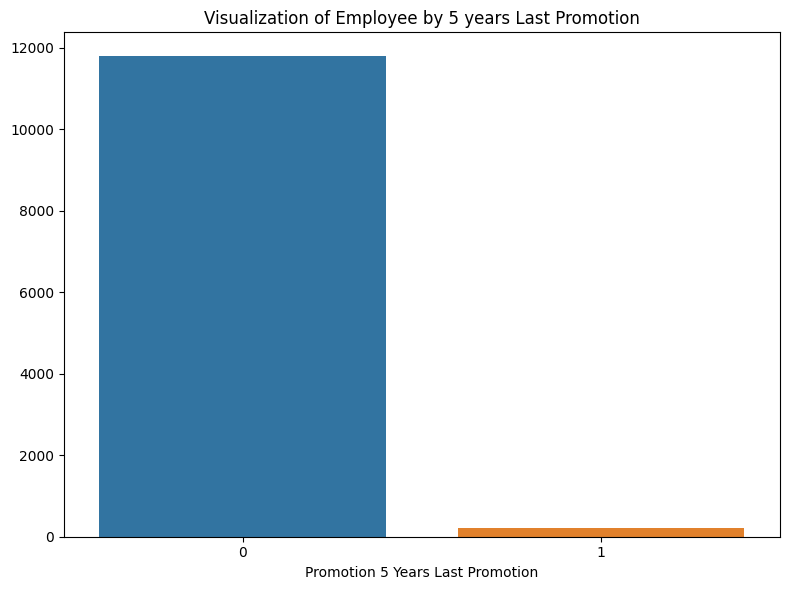

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='promotion_last_5years')
plt.title('Visualization of Employee by 5 years Last Promotion')
plt.xlabel('Promotion 5 Years Last Promotion')
plt.ylabel('')
plt.tight_layout()
plt.show()

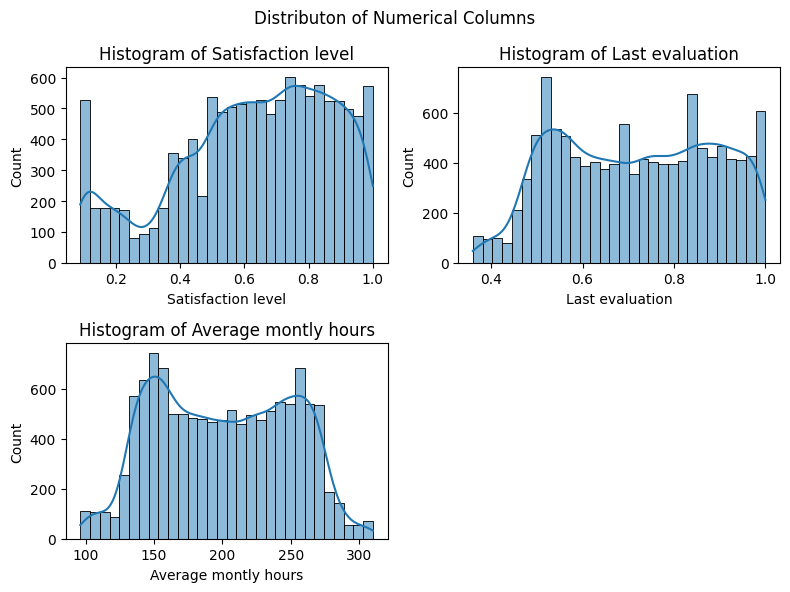

In [18]:
num_cols=['satisfaction_level','last_evaluation', 'average_montly_hours']
fig, axes=plt.subplots(2,2, figsize=(8,6))
axes=axes.flatten()
plt.suptitle('Distributon of Numerical Columns')
for i, col in enumerate(num_cols):
    sns.histplot(Data[col], bins=30, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {col.capitalize().replace("_", " ")}')
    axes[i].set_xlabel(col.capitalize().replace("_"," "))

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

## Bivariate Analysis

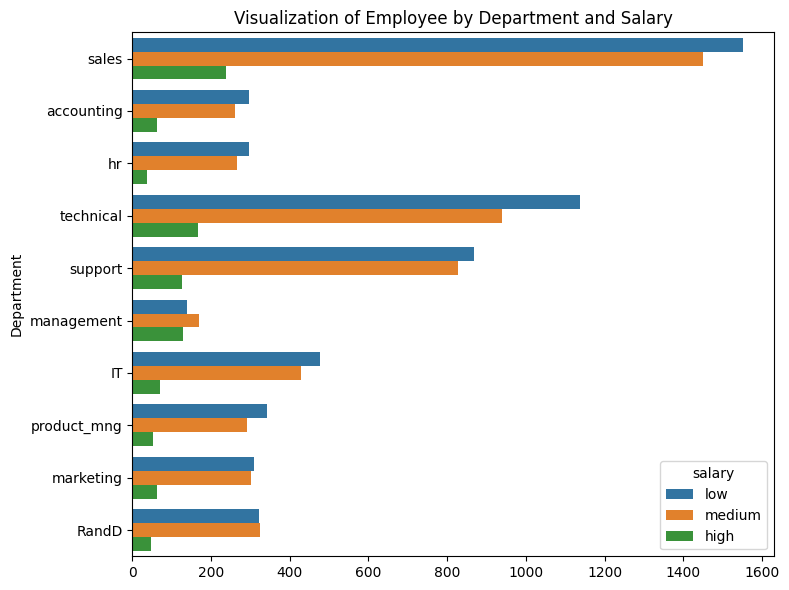

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, y='Department', hue='salary')
plt.title('Visualization of Employee by Department and Salary')
plt.xlabel('')
plt.tight_layout()
plt.show()

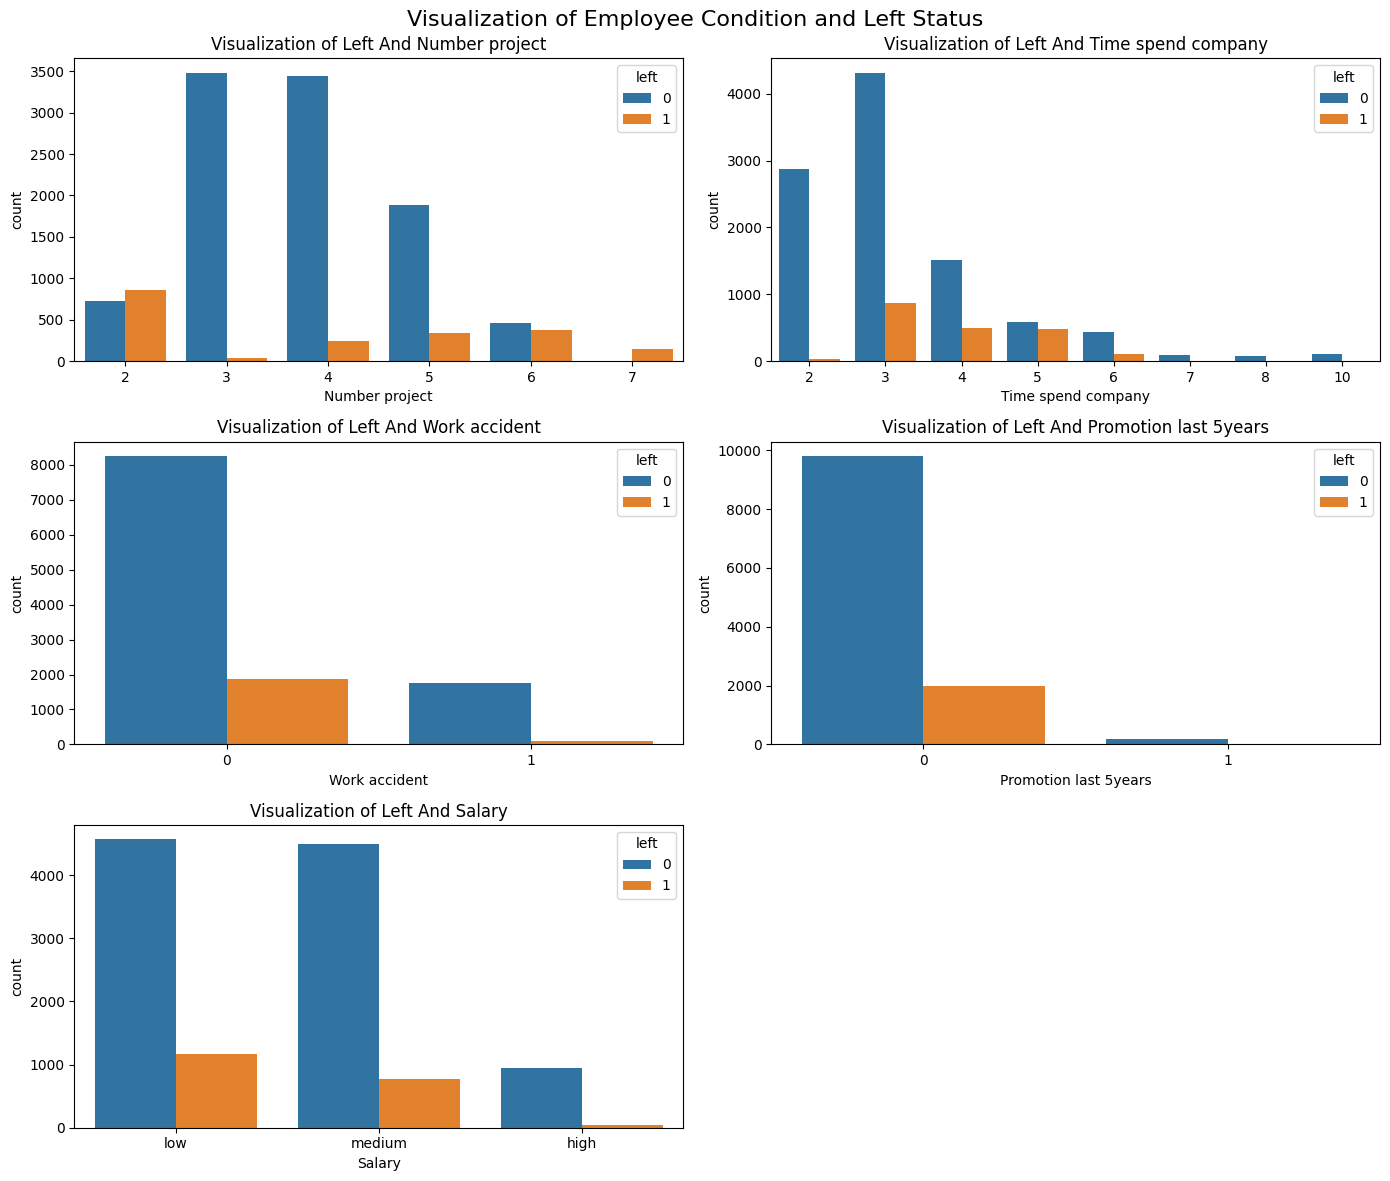

In [20]:
employee_cols=['number_project','time_spend_company','Work_accident','promotion_last_5years','salary']

fig, axes=plt.subplots(3,2, figsize=(14,12))
axes=axes.flatten()
plt.suptitle('Visualization of Employee Condition and Left Status', fontsize=16)
for i, col in enumerate(employee_cols):
    sns.countplot(data=Data, x=col,hue='left', ax=axes[i])
    axes[i].set_xlabel(col.capitalize().replace("_"," "))
    axes[i].set_title(f'Visualization of Left And {col.capitalize().replace("_"," ")}')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

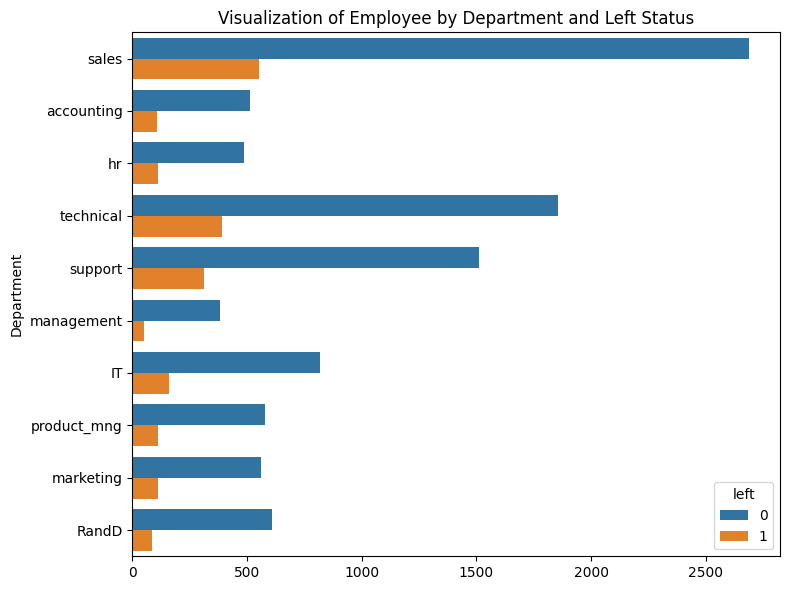

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(data=Data, y='Department', hue='left')
plt.title('Visualization of Employee by Department and Left Status')
plt.xlabel('')
plt.tight_layout()
plt.show()

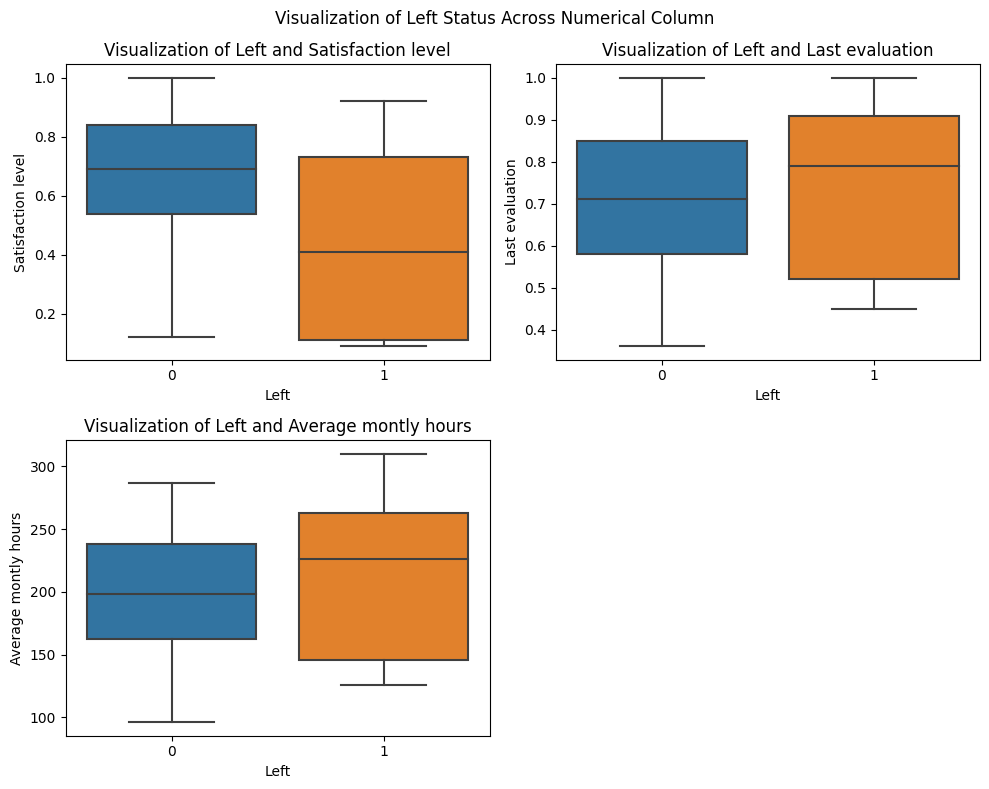

In [22]:
num_cols=['satisfaction_level','last_evaluation','average_montly_hours']
fig, axes=plt.subplots(2,2, figsize=(10,8))
axes=axes.flatten()
plt.suptitle('Visualization of Left Status Across Numerical Column')
for i, col in enumerate(num_cols):
    sns.boxplot(data=Data, x='left', y=col, ax=axes[i])
    axes[i].set_xlabel('Left')
    axes[i].set_ylabel(col.capitalize().replace("_", " "))
    axes[i].set_title(f'Visualization of Left and {col.capitalize().replace("_"," ")}', fontsize=12)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

## Multivariate Analysis

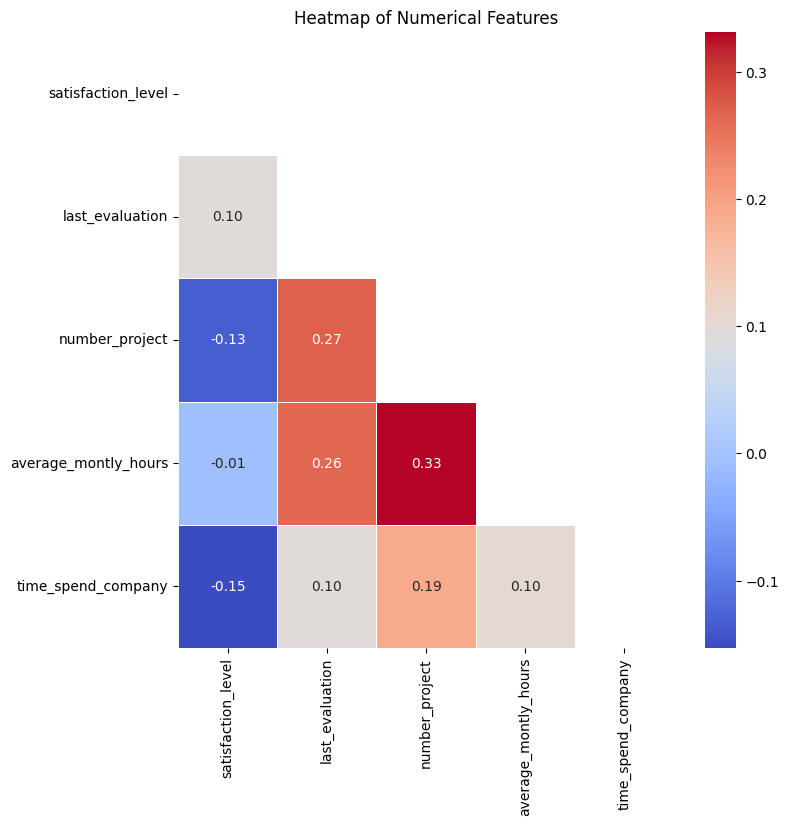

In [23]:
Corr_cols=Data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
Corr_num=Corr_cols.corr()
mask=mask=np.triu(np.ones_like(Corr_num,dtype=bool))

plt.figure(figsize=(8,8))
sns.heatmap(Corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Numerical Features')
plt.show()

# Preprocessing 

## Encode

In [24]:
cols_to_encode=['Department', 'salary']
encoder=OneHotEncoder(drop='first', sparse=False, dtype=int)
encoder.fit(Data[cols_to_encode])
encoded_data=encoder.transform(Data[cols_to_encode])

encode_cols=encoder.get_feature_names_out(cols_to_encode)
encode_df=pd.DataFrame(encoded_data, columns=encode_cols)

Data=pd.concat([Data.drop(columns=cols_to_encode).reset_index(drop=True), encode_df.reset_index(drop=True)],
             axis=1)

## Normalization

In [25]:
col_to_scale=['average_montly_hours']
scaler=StandardScaler()
scaler.fit(Data[col_to_scale])
Data[col_to_scale]=scaler.transform(Data[col_to_scale])

## Split Training Data and Test Data

In [26]:
X=Data.drop(columns='left', axis=1)
y=Data['left']

In [27]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data Shape= X_train: {X_train.shape}, y_train: {y_train.shape} ")
print(f"Test Data Shape = X_test : {X_test.shape}, y_test: {y_test.shape}")

Training Data Shape= X_train: (9592, 18), y_train: (9592,) 
Test Data Shape = X_test : (2399, 18), y_test: (2399,)


## Balance Target Variable

In [28]:
train_df=X_train.copy()
train_df['left']=y_train

left_majority=train_df[train_df['left']==0]
left_minority=train_df[train_df['left']==1]

left_oversample_minority=resample(
    left_minority, 
    replace=True,
    n_samples=len(left_majority),
    random_state=42
)

train_balance=pd.concat([left_majority, left_oversample_minority])
train_balance=train_balance.sample(frac=1, random_state=42).reset_index(drop=True)

X_train=train_balance.drop(columns='left', axis=1)
y_train=train_balance['left']
y_train.value_counts()


left
1    8002
0    8002
Name: count, dtype: int64

# Modeling

## Logistic Regression

### Score Metric

In [29]:
LG=LogisticRegression().fit(X_train, y_train)
eval_train_lg=LG.predict(X_train)
eval_test_lg=LG.predict(X_test)

acc_lg=accuracy_score(y_test, eval_test_lg)
precision_lg=precision_score(y_test, eval_test_lg)
recall_lg=recall_score(y_test, eval_test_lg)
f1_lg=f1_score(y_test, eval_test_lg)

In [30]:
Metrics_df=({
    'Accuracy':[acc_lg],
    'Precision':[precision_lg],
    'Recall':[recall_lg],
    'F1':[f1_lg]
})
Metrics_df=pd.DataFrame(Metrics_df, index=['Logistic Regression'])
Metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.781992,0.422785,0.832918,0.560873


### Classification Report

In [31]:
print('Training Data')
print(classification_report(y_train, eval_train_lg))
print("="*50)
print("Test Data")
print(classification_report(y_test, eval_test_lg))

Training Data
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      8002
           1       0.78      0.83      0.80      8002

    accuracy                           0.80     16004
   macro avg       0.80      0.80      0.80     16004
weighted avg       0.80      0.80      0.80     16004

Test Data
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1998
           1       0.42      0.83      0.56       401

    accuracy                           0.78      2399
   macro avg       0.69      0.80      0.71      2399
weighted avg       0.87      0.78      0.81      2399



### Confusion Matrix

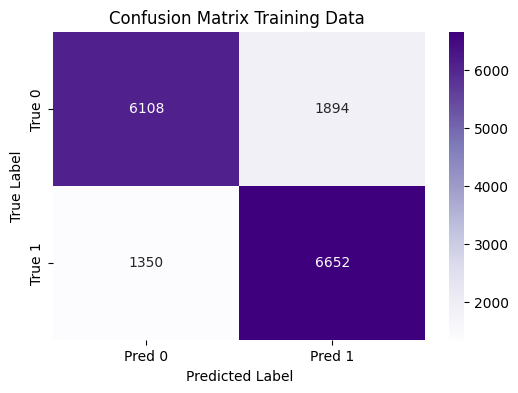

In [32]:
cm_train_lg=confusion_matrix(y_train, eval_train_lg)

plt.figure(figsize=(6,4))
sns.heatmap(cm_train_lg, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data ')
plt.show()

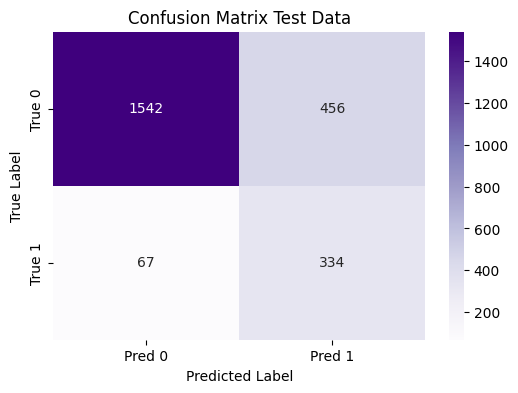

In [33]:
cm_test_lg=confusion_matrix(y_test, eval_test_lg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_test_lg, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Random Forest 

### Score Metric

In [34]:
RF=RandomForestClassifier().fit(X_train, y_train)
eval_train_rf=RF.predict(X_train)
eval_test_rf=RF.predict(X_test)

acc_rf=accuracy_score(y_test, eval_test_rf)
precision_rf=precision_score(y_test, eval_test_rf)
recall_rf=recall_score(y_test, eval_test_rf)
f1_rf=f1_score(y_test, eval_test_rf)

In [35]:
Metrics_df.loc['Random Forest']=[acc_rf, precision_rf, recall_rf, f1_rf]
Metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.781992,0.422785,0.832918,0.560873
Random Forest,0.979158,0.978202,0.895262,0.934896


### Classification Report

In [36]:
print("Training Data")
print(classification_report(y_test, eval_test_rf))
print("="*50)
print("Test Data")
print(classification_report(y_test, eval_test_rf))

Training Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Test Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



### Confusion Matrix

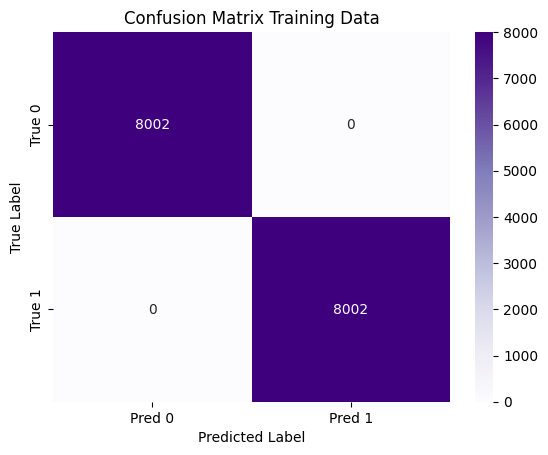

In [37]:
cm_train_rf=confusion_matrix(y_train, eval_train_rf)
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

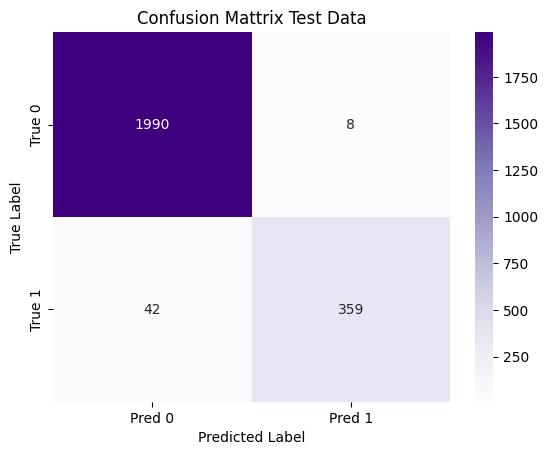

In [38]:
cm_test_rf=confusion_matrix(y_test, eval_test_rf)
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Mattrix Test Data')
plt.show()

## Decision Tree 

### Score Metric

In [39]:
DT=DecisionTreeClassifier().fit(X_train, y_train)
eval_train_dt=DT.predict(X_train)
eval_test_dt=DT.predict(X_test)

acc_dt=accuracy_score(y_test, eval_test_dt)
precision_dt=precision_score(y_test, eval_test_dt)
recall_dt=recall_score(y_test, eval_test_dt)
f1_dt=f1_score(y_test, eval_test_dt)

In [40]:
Metrics_df.loc['Decision Tree']=[acc_dt, precision_dt, recall_dt, f1_dt]
Metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.781992,0.422785,0.832918,0.560873
Random Forest,0.979158,0.978202,0.895262,0.934896
Decision Tree,0.970821,0.921120,0.902743,0.911839


### Classification Report

In [41]:
print('Training Data')
print(classification_report(y_train, eval_train_dt))
print('='*50)
print('Test Data')
print(classification_report(y_test, eval_test_dt))

Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8002
           1       1.00      1.00      1.00      8002

    accuracy                           1.00     16004
   macro avg       1.00      1.00      1.00     16004
weighted avg       1.00      1.00      1.00     16004

Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.92      0.90      0.91       401

    accuracy                           0.97      2399
   macro avg       0.95      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



### Confusion Matrix

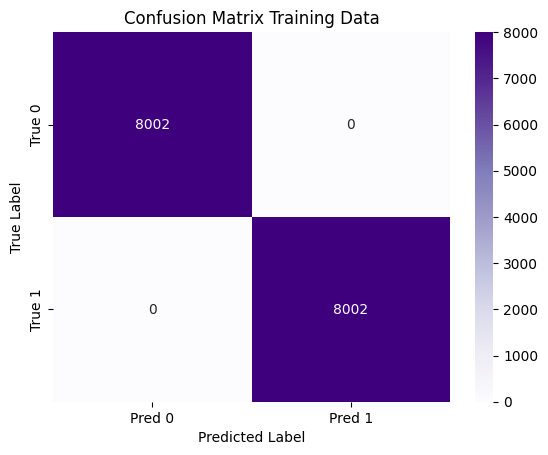

In [42]:
cm_train_dt=confusion_matrix(y_train, eval_train_dt)
sns.heatmap(cm_train_dt, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

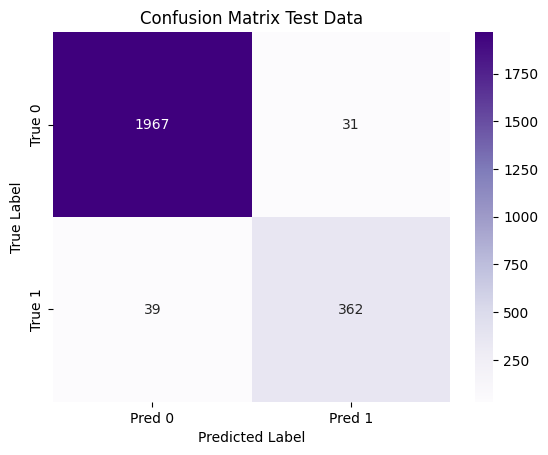

In [43]:
cm_test_dt=confusion_matrix(y_test, eval_test_dt)
sns.heatmap(cm_test_dt, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## Gradient Boosting

### Score Metric

In [44]:
GBC=GradientBoostingClassifier().fit(X_train, y_train)
eval_train_gbc=GBC.predict(X_train)
eval_test_gbc=GBC.predict(X_test)

acc_gbc=accuracy_score(y_test, eval_test_gbc)
precision_gbc=precision_score(y_test, eval_test_gbc)
recall_gbc=recall_score(y_test, eval_test_gbc)
f1_gbc=f1_score(y_test, eval_test_gbc)

In [45]:
Metrics_df.loc['Gradient Boosting']=[acc_gbc, precision_gbc, recall_gbc, f1_gbc]
Metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.781992,0.422785,0.832918,0.560873
Random Forest,0.979158,0.978202,0.895262,0.934896
Decision Tree,0.970821,0.921120,0.902743,0.911839
Gradient Boosting,0.967486,0.896806,0.910224,0.903465


### Classification Report

In [46]:
print('Training Data')
print(classification_report(y_train, eval_train_gbc))
print("="*50)
print("Test Data")
print(classification_report(y_test, eval_test_gbc))

Training Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8002
           1       0.98      0.95      0.97      8002

    accuracy                           0.97     16004
   macro avg       0.97      0.97      0.97     16004
weighted avg       0.97      0.97      0.97     16004

Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.90      0.91      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



### Confusion Matrix

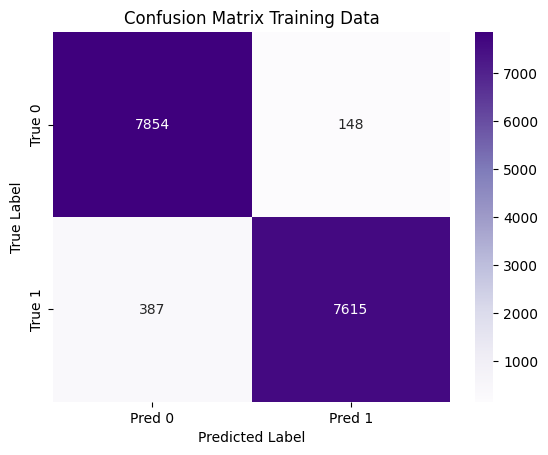

In [47]:
cm_train_gbc=confusion_matrix(y_train, eval_train_gbc)
sns.heatmap(cm_train_gbc, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

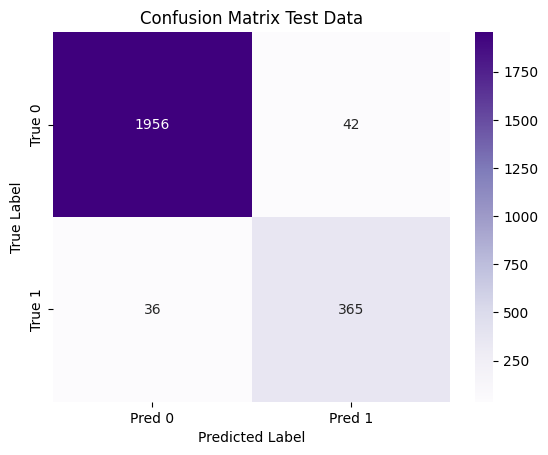

In [48]:
cm_test_gbc=confusion_matrix(y_test, eval_test_gbc)
sns.heatmap(cm_test_gbc, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Data')
plt.show()

## XGBoost

### Score Metric

In [49]:
XGB=xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
).fit(X_train, y_train)

eval_train_xgb=XGB.predict(X_train)
eval_test_xgb=XGB.predict(X_test)

acc_xgb=accuracy_score(y_test, eval_test_xgb)
precision_xgb=precision_score(y_test, eval_test_xgb)
recall_xgb=recall_score(y_test, eval_test_xgb)
f1_xgb=f1_score(y_test, eval_test_xgb)

In [50]:
Metrics_df.loc['XGB']=[acc_xgb, precision_xgb, recall_xgb, f1_xgb]
Metrics_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.781992,0.422785,0.832918,0.560873
Random Forest,0.979158,0.978202,0.895262,0.934896
Decision Tree,0.970821,0.921120,0.902743,0.911839
Gradient Boosting,0.967486,0.896806,0.910224,0.903465
XGB,0.969987,0.908189,0.912718,0.910448


### Classification Report

In [51]:
print('Training Data')
print(classification_report(y_train, eval_train_xgb))
print("="*50)
print('Test Data')
print(classification_report(y_test, eval_test_xgb))

Training Data
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8002
           1       0.98      0.95      0.96      8002

    accuracy                           0.96     16004
   macro avg       0.96      0.96      0.96     16004
weighted avg       0.96      0.96      0.96     16004

Test Data
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.91      0.91      0.91       401

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



### Confusion Matrix

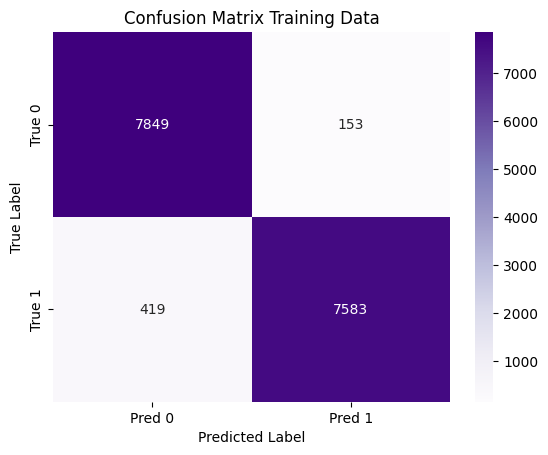

In [52]:
cm_train_xgb=confusion_matrix(y_train, eval_train_xgb)
sns.heatmap(cm_train_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Training Data')
plt.show()

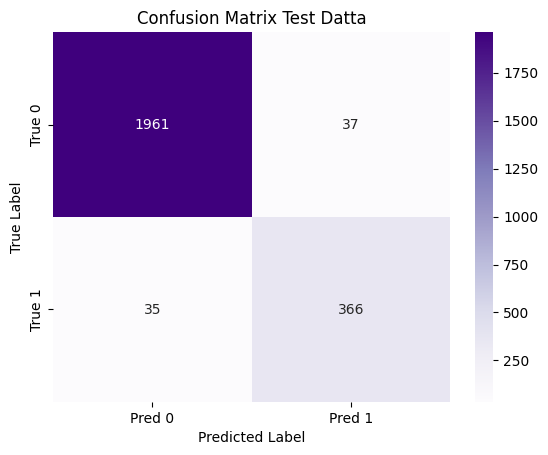

In [53]:
cm_test_xgb=confusion_matrix(y_test, eval_test_xgb)
sns.heatmap(cm_test_xgb, annot=True, fmt='d', cmap='Purples', xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Test Datta')
plt.show()

# Model Test

In [54]:
def pred_model(satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, salary):
    input_df=pd.DataFrame([{
        'satisfaction_level':satisfaction_level,
        'last_evaluation':last_evaluation,
        'number_project':number_project,
        'average_montly_hours':average_montly_hours,
        'time_spend_company':time_spend_company,
        'Work_accident':Work_accident,
        'promotion_last_5years':promotion_last_5years,
        'Department':Department,
        'salary':salary
    }])
    
    input_df[col_to_scale]=scaler.transform(input_df[col_to_scale])
    
    encode_input=encoder.transform(input_df[cols_to_encode])
    encode_input=pd.DataFrame(encode_input, columns=encode_cols)
    final_input=pd.concat(
        [input_df.drop(columns=cols_to_encode).reset_index(drop=True), 
        encode_input.reset_index(drop=True)],
        axis=1
    )
    predicted=RF.predict(final_input)
    if predicted[0] ==1:
        Left='Yes'
    elif predicted[0]==0:
        Left='N0'
    return Left



In [55]:
Employee=pred_model(
    satisfaction_level=0.38,
    last_evaluation=0.53,
    number_project=2,
    average_montly_hours=160,
    time_spend_company=5,
    Work_accident=0,
    promotion_last_5years=0,
    Department='sales',
    salary='low'
)
print("Predicted Employee Left Status:", Employee)

Predicted Employee Left Status: Yes


### Conclusion
- Based on the evaluation results of each algorithm used, Random Forest showed good performance on the Accuracy, Precision and F1-Score metrics. However, the recall value for Random Forest was lower than that for decision Tree, Gradient Boosting and XGBoost. Meanwhile, the algorithm with the lowest performance on several metrics, such as Precision and others, was Logistic Regression
- Hyperparameter tuning was not performed in this project because the metrics obtained already showed excellent performance
- In this project, all features or variables in the dataset support predictions about whether employees will stay or leave
